In [1]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, AncillaRegister
from qiskit.quantum_info import Statevector, Operator

import matplotlib.pyplot as plt


import numpy as np

# Grover's algorithm

Input:

$| s \rangle$: initial state

$| t \rangle$: target state

Adjust phases, so that

$\sqrt{\lambda} := \langle s | t\rangle \in \mathbb{R}_+$.

Then $\lambda \in (0, 1)$ is the probability of measuring $| t \rangle$ in state $| s \rangle$. Write

$$
| s^\perp \rangle = \frac{| t \rangle - \sqrt{\lambda} | s \rangle}{\sqrt{1 - \lambda}}.
$$

Then $\langle s^\perp | s^\perp \rangle = 1$ and

$$
| t^\perp \rangle := \sqrt{1 - \lambda} | s \rangle - \sqrt{\lambda} | s^\perp \rangle.
$$

Assume we have $S$ and $U$, such that

$S | s \rangle = - | s \rangle$ and $S | s^\perp \rangle = | s^\perp \rangle$.

$U | t \rangle = - | t \rangle$ and $U | t^\perp \rangle = | s^\perp \rangle$.

Remark: Their actions on $\mathrm{span} \left( \left\{ | s \rangle, | t \rangle \right\} \right)^\perp$ is irrelevant.

NOTE: $G := - S \circ U$ is a rotation by $\Theta := 2 \arcsin \left( \sqrt{\lambda} \right)$ in the $\mathrm{span} \left( \left\{ | s \rangle, | t \rangle \right\} \right)$ plane (positively oriented).

Thm (Grover '96):

\begin{equation}
    \mathbb{P} (t | k) := \left| \langle t | G^k | s \rangle \right|^2 = \sin^2 \left( \left(k + \tfrac{1}{2} \right) \Theta \right).
\end{equation}

Maximum success probability at $K := \lfloor \tfrac{\pi}{2 \Theta} - \tfrac{1}{2} \rceil$.

## Example: Solving Pseudo-boolean equations.

Let $F: \mathbb{F}_2^2 \rightarrow \mathbb{Z}$ be defined as

\begin{equation}
    F(x_0, x_1) = 2 x_0 + x_1.
\end{equation}

Our goal is the solve the equation
\begin{equation}
    F(x_0, x_1) = 2,
\end{equation}

using Grover's algorithm.

## Ingredients for the marker oracle

Check that the following circuit achieves $| x \rangle_2 \rangle | 0 \rangle_2 \mapsto | x \rangle_2 | F(x) \rangle$.

(More generally, it s action is given by $| x \rangle_2 \rangle | y \rangle_2 \mapsto | x \rangle_2 | y + F(x) \: \mod \: 2^2 \rangle$)

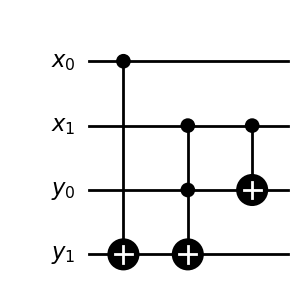

In [8]:
quantum_register = QuantumRegister(size=2, name="x")
ancilla_register = AncillaRegister(size=2, name="y")

F_adder = QuantumCircuit(quantum_register, ancilla_register, name="F(x) adder")

F_adder.cx(quantum_register[0], ancilla_register[1])
F_adder.ccx(quantum_register[1], ancilla_register[0], ancilla_register[1])
F_adder.cx(quantum_register[1], ancilla_register[0])

F_adder.draw(output="mpl", style="bw")

Let us create the inverse to $F_{adder}$!

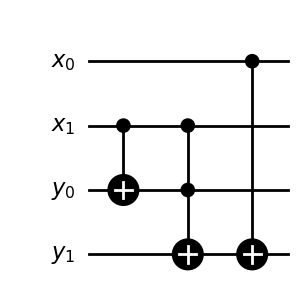

In [10]:
quantum_register = QuantumRegister(size=2, name="x")
ancilla_register = AncillaRegister(size=2, name="y")

F_subtractor = QuantumCircuit(quantum_register, ancilla_register, name="F(x) subtractor")

### write the rest of the code below
F_subtractor.cx(quantum_register[1], ancilla_register[0])
F_subtractor.ccx(quantum_register[1], ancilla_register[0], ancilla_register[1])
F_subtractor.cx(quantum_register[0], ancilla_register[1])




###

F_subtractor.draw(output="mpl", style="bw")

### There is also a quicker way! 'F_subtractor' is the same as 'F_adder.inverse()'

In [ ]:
F_adder.inverse().draw(output="mpl", style="bw")

In [ ]:
A = F_adder.to_gate()
Adg = F_subtractor.to_gate()

Let $| t \rangle = | x_0 x_1 \rangle$ be such that $F(x_0, x_1) = 2$.

## Use $A$ and $A^\dagger$ (without soliving for $(x_0, x_1) \in \mathbb{F}_2^2$) to create the marker oracle, $U$.

Note: 'circuit.compose(A, inplace=True)' applies the gate 'A' to 'circuit'

In [ ]:
quantum_register = QuantumRegister(size=2, name="x")
ancilla_register = AncillaRegister(size=2, name="y")

marker_circuit = QuantumCircuit(quantum_register, ancilla_register, name="marker")

### write the rest of the code below



###

marker_circuit.draw(output="mpl", style="bw")

Can you simplify the the above circuit?

## State preparation.

Let $| s \rangle := \tfrac{1}{2} \left( | 00 \rangle + | 10 \rangle + | 01 \rangle + | 11 \rangle \right)$.

Let us create a circuit, $\mathrm{Prep}$, that creates this state, that is

$\mathrm{Prep} | 0 \rangle = | s \rangle$.

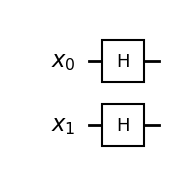

In [3]:
quantum_register = QuantumRegister(size=2, name="x")

state_preparation_circuit = QuantumCircuit(quantum_register, name="State preparation")

state_preparation_circuit.h(quantum_register)

state_preparation_circuit.draw(output="mpl", style="bw")

In [ ]:
Prep = state_preparation_circuit.to_gate()

## Let's create the "diffuser" circtuit, $S$.

In [ ]:
quantum_register = QuantumRegister(size=2, name="x")

diffuser_circuit = QuantumCircuit(quantum_register, name="diffuser")

### write the rest of the code below



###

diffuser_circuit.draw(output="mpl", style="bw")

In [ ]:
U = marker_circuit.to_gate()
D = diffuser_circuit.to_gate()

What is the number of iteration, $K$, that you will need?

In [ ]:
n = 2
N = 2**n

### K = ? (write it as a function of N)

# Full Grover circuit

Construct the full Grover search circuit and check the probabilities as the end.

In [ ]:
quantum_register = QuantumRegister(size=2, name="x")
ancilla_register = AncillaRegister(size=2, name="y")

grover_circuit = QuantumCircuit(quantum_register, ancilla_register, name="Grover circuit")

### write the rest of the code below



###

grover_circuit.draw(output="mpl", style="bw")

In [ ]:
psi = Statevector(grover_circuit)
psi.probabilities()

Numerical noise makes it seem messy, so let's simplify:

In [ ]:
np.round(psi.probabilities(), 4)

Maximum probability at $\mathrm{index} = 1$, which is equivalent to $(x_0, x_1) = (1, 0)$, and $F (1, 0) = 2 \cdot 1 + 0 = 2$.

# Change in the probability density over the iterations

In [ ]:
n = 7
N = 2**n
K = int(np.rint(np.pi / (4 * np.arcsin(1 / np.sqrt(N))) - 1/2))
Theta = 2 * np.arcsin(1/np.sqrt(N))
K, Theta

In [ ]:
iterations = np.arange(1, 4 * K + 1) # let us allow under-, and overcooking
P_success_over_time = np.square(np.sin((iterations + 1/2) * Theta))

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(15, 5))

axs[0].bar(iterations,
           P_success_over_time,
           width=0.5,
           color="green")
axs[0].set(xlabel=f"iteration",
           ylabel=f"probability")
axs[0].axvline(x = K,
               linewidth=1.5,
               color="black",
               label=r"Max $P_{success}$")

axs[0].legend(loc='best')

axs[1].bar(iterations,
           P_success_over_time / iterations,
           width=0.5,
           color="green")
axs[1].set(xlabel=f"iteration",
           ylabel=f"probability / iteration")
axs[1].axvline(x = iterations[np.argmax(P_success_over_time / iterations)],
               linewidth=1.5,
               color="black",
               label=r"Max $\frac{P_{success}}{\mathrm{iteration}}$")

axs[1].legend(loc='best')

plt.show()

NOTE: if you are optimizing for expected amounts of overall resources, then running $k = 6 (< 8 = K)$ iterations yields better results!

In [8]:
# Qiskit 1.x compatible
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import transpile
from qiskit_aer import Aer
from qiskit_aer.noise import NoiseModel, depolarizing_error
from qiskit.quantum_info import Pauli, PauliList
from itertools import product
import numpy as np
from qiskit.circuit.library import XGate, ZGate

# ----- 5-qubit code data -----
# Stabilizer generators (cyclic form): XZZXI, IXZZX, XIXZZ, ZXIXZ
gens_str = ["XZZXI", "IXZZX", "XIXZZ", "ZXIXZ"]
G = PauliList([Pauli(s) for s in gens_str])   # 4 stabilizers on 5 data qubits

# Logical operators (one valid choice for the 5-qubit code)
ZL = Pauli("ZZZZZ")
XL = Pauli("XXXXX")

# |0_L> statevector (standard form); |1_L> = X^{\otimes 5} |0_L>
# Source: canonical 5-qubit perfect codeword
basis_0L = [
 "00000","10010","01001","10100","01010",
 "11011","00110","11000","11101","00011",
 "11110","01111","10001","01100","10111","00101"
]
phases_0L = [ 1, 1, 1, 1, 1, -1,-1,-1,-1,-1,-1,-1,-1,-1,-1, 1 ]  # +/− signs aligned with the list above
amp = 1/4
psi0 = np.zeros(2**5, dtype=complex)
for b,sgn in zip(basis_0L, phases_0L):
    psi0[int(b,2)] = amp*sgn

def logical_state(x):
    """Return statevector for |x_L>, x in {0,1}."""
    if x==0:
        return psi0
    # |1_L> = X^{\otimes 5} |0_L>
    psi1 = np.zeros_like(psi0)
    for i in range(2**5):
        # bitwise flip of 5 bits
        j = i ^ 0b11111
        psi1[j] = psi0[i]
    return psi1

# ----- circuit helpers -----
def measure_stabilizer(qc, data, anc, stab: Pauli):
    """Measure multi-Pauli stabilizer onto anc (measured to a classical bit already mapped)."""
    # Basis change to turn X/Y to Z
    for q, (x, z) in zip(data, zip(stab.x, stab.z)):
        if x and not z:             # X -> Z via H
            qc.h(q)
        elif x and z:               # Y -> Z via S† H
            qc.sdg(q); qc.h(q)
    # Parity CNOTs onto anc
    for q, (x, z) in zip(data, zip(stab.x, stab.z)):
        if x or z:
            qc.cx(q, anc)
    # Undo basis change
    for q, (x, z) in zip(data, zip(stab.x, stab.z)):
        if x and not z:
            qc.h(q)
        elif x and z:
            qc.h(q); qc.s(q)

def syndrome_table():
    """Map 4-bit syndrome -> (qubit_index, Pauli to correct) for all single-qubit {X,Y,Z} errors."""
    table = {}
    single_errors = []
    labels = ["I"]*5
    for q in range(5):
        for P in "XYZ":
            lab = labels.copy(); lab[q] = P
            single_errors.append((q, Pauli("".join(lab))))
    for q, E in single_errors:
        # syndrome bit i = 1 if anti-commutes with generator i
        syn_bits = []
        for g in G:
            anticomm = (E.commutes(g) == False)
            syn_bits.append(int(anticomm))
        s = int("".join(map(str, syn_bits[::-1])), 2)  # classical reg: g3 g2 g1 g0
        # Pick correction = same Pauli on that qubit (minimum-weight)
        # Only set first time; multiple errors won't collide for distance-3
        table.setdefault(s, (q, E))
    table.setdefault(0b0000, None)  # no correction
    return table

SYN_TABLE = syndrome_table()

def add_recovery(qc, data, c_syn):
    """Classically-conditioned corrections without control-flow."""
    for s, fix in SYN_TABLE.items():
        if fix is None:
            continue
        q, E = fix
        if E.x[q] and not E.z[q]:        # X
            qc.append(XGate().c_if(c_syn, s), [data[q]])
        elif (not E.x[q]) and E.z[q]:    # Z
            qc.append(ZGate().c_if(c_syn, s), [data[q]])
        elif E.x[q] and E.z[q]:          # Y = Z then X (up to phase)
            qc.append(ZGate().c_if(c_syn, s), [data[q]])
            qc.append(XGate().c_if(c_syn, s), [data[q]])


def build_circuit(x, p):
    """One full round: prepare |x_L>, noise, syndrome, recovery, and measure."""
    # 5 data + 4 ancillas
    data = QuantumRegister(5, "d")
    anc  = QuantumRegister(4, "a")
    c_syn = ClassicalRegister(4, "syn")    # s3 s2 s1 s0
    c_dat = ClassicalRegister(5, "m")      # Z-basis of data (for Z_L parity)
    qc = QuantumCircuit(data, anc, c_syn, c_dat)

    # Prepare |x_L> with StatePreparation
    from qiskit.circuit.library import StatePreparation
    qc.append(StatePreparation(logical_state(x), normalize=True), data[:])

    # Insert one 'id' per data qubit (this is where we hang the depolarizing noise)
    for q in data:
        qc.id(q)

    # Measure stabilizers onto ancillas
    for i, stab in enumerate(G):
        measure_stabilizer(qc, data, anc[i], stab)
        qc.measure(anc[i], c_syn[i])

    # Recovery conditioned on the 4-bit register
    add_recovery(qc, data, c_syn)

    # Measure data qubits in Z to check stabilizers (post) + compute logical Z = parity of 5 Zs
    qc.measure(data, c_dat)
    return qc

# ----- simulation / success metric -----
def success_probability(x, p, shots=10_000):
    qc = build_circuit(x, p)
    # Noise: depolarizing on 1q gates; attach to 'id' only so noise occurs once between prep and syndrome
    nm = NoiseModel()
    nm.add_all_qubit_quantum_error(depolarizing_error(p, 1), ['id'])
    backend = Aer.get_backend("qasm_simulator")
    tqc = transpile(qc, backend)
    res = backend.run(tqc, noise_model=nm, shots=shots).result()
    counts = res.get_counts()

    succ = 0
    total = 0
    for bitstr, c in counts.items():
        # bitstring ordering: "m4 m3 m2 m1 m0 syn3 syn2 syn1 syn0"
        m = bitstr[-9:]  # ensure length
        m_dat = m[:5]
        m_syn = m[5:]
        parity = sum(int(b) for b in m_dat) % 2  # 1 if odd number of '1's
        synd_ok = (m_syn == "0000")
        # logical Z eigenvalue (-1)^parity; expecting parity == x
        if synd_ok and (parity == x):
            succ += c
        total += c
    return succ/total

# ----- sweep example -----
if __name__ == "__main__":
    ps = np.linspace(0, 0.2, 9)  # 0, .025, ..., .2
    for x in [0, 1]:
        probs = [success_probability(x, p, shots=5000) for p in ps]
        print(f"x={x}:")
        for p, sp in zip(ps, probs):
            print(f"  p={p:.3f}  success≈{sp:.4f}")


AttributeError: '_SingletonXGate' object has no attribute 'c_if'